In [1]:
import numpy as np
import os
import pandas as pd
from models.inference_unet import get_trained_unet, get_inference
from analysis.analysis import *
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
##########################################
# sort pngs
path = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\TestSMB\unilever_test\data'
#path = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\TestSMB\dummy_data'
file_list = get_files(path, initials='uni')


#########################################
# get mask
# model init
device = 'cpu'
model=get_trained_unet(model_name='unet_vgg11_transpose2d',
                       path=r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\TestSMB\Opentron\weights\unet_gen',
                       params ='unet_vgg11_aug_lr1e-5_params_59_lr_1e-05.pt'
                      )

file = file_list[0] # take first file

# inference
(img,mask)=get_inference(model,
                         image_path=os.path.join(path,file),
                         crop = 0.2,
                         transform_hr=transforms.Compose([transforms.ToTensor(),transforms.Resize((512,512))]),
                         device =device)

C:\Users\scrc112\.conda\envs\pyg\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [12]:
w = img.shape[0]
w

512

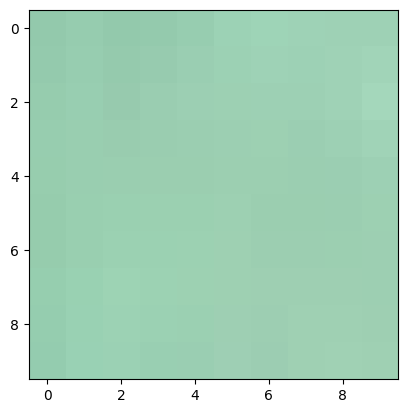

In [24]:
plt.imshow(img[int(w//2-5):int(w//2+5),int(w-10):w,:])

In [35]:
img[int(w//2-5):int(w//2+5),int(w-10):w,:].mean(axis = (0,1))

array([0.6097298 , 0.8137431 , 0.69892293], dtype=float32)

In [25]:
img.max()

1.0